# Spatiotemporal distribution of apoptoses

### This notebook counts the xyt positions of a series of apoptosis events - a meta-analysis of the cumulative event counter

1. Load dictionary of apoptoses and theur corresponding times
2. Load corresponding tracking data
3. Iteratively calculate the xyt positioning of all apoptoses
4. Plot as graphs

In [1]:
import calculate_radial_analysis as calculate
import tools
import render

import json
import glob
import os
import re
import numpy as np
from natsort import natsorted
from tqdm import tqdm
import matplotlib.pyplot as plt

## 1) Apoptosis dictionary loader
Specify cell type to filter out unwanted apoptoses, want end result of apop_dict that takes the format of :`apop_dict = {apop_ID:apop_time}` 

where `apop_ID` takes the format of: `GV{experiment_ID}_Pos{position_ID}_{cell_ID}_{cell_type}` 

For example: 

```
apop_dict = {'GV0794_Pos4_393_GFP': '766',
             'GV0794_Pos7_364_GFP': '550',
             'GV0794_Pos7_457_GFP': '805',
             'GV0794_Pos7_369_GFP': '833',
             'GV0794_Pos7_292_GFP': '884',
             'GV0795_Pos4_358_GFP': '628',
             'GV0795_Pos4_18_GFP': '855',
             'GV0795_Pos4_1356_GFP': '992',
             'GV0795_Pos4_359_GFP': '1133',
             'GV0796_Pos4_542_GFP': '581',
             'GV0796_Pos4_1334_GFP': '719',
             'GV0796_Pos4_1586_GFP': '785'}
 ```

In [2]:
cell_type = 'GFP'
path_to_apop_lists = '/home/nathan/data/kraken/h2b/giulia/apoptosis_information/final/all'
expts_apop_lists = os.listdir(path_to_apop_lists)
apop_dict = {}
for expt_apop_list in expts_apop_lists:
    apop_list = open(os.path.join(path_to_apop_lists, expt_apop_list), 'r')
    for apop_ID in apop_list:
        if cell_type in apop_ID:
            if 'stitched' not in apop_ID:
                apop_dict[apop_ID.split()[0]] = apop_ID.split()[1]
apop_dict

{'GV0819_Pos0_677_GFP': '635',
 'GV0819_Pos0_913_GFP': '855',
 'GV0819_Pos0_898_GFP': '866',
 'GV0819_Pos0_22_GFP': '874',
 'GV0819_Pos0_1_GFP': '887',
 'GV0819_Pos0_1831_GFP': '906',
 'GV0819_Pos0_897_GFP': '944',
 'GV0819_Pos0_847_GFP': '944',
 'GV0819_Pos0_846_GFP': '944',
 'GV0819_Pos0_1712_GFP': '932',
 'GV0819_Pos0_2151_GFP': '920',
 'GV0819_Pos0_673_GFP': '957',
 'GV0819_Pos0_1319_GFP': '939',
 'GV0819_Pos0_2622_GFP': '1005',
 'GV0819_Pos0_1622_GFP': '1005',
 'GV0819_Pos0_98_GFP': '928',
 'GV0819_Pos0_2345_GFP': '1003',
 'GV0819_Pos0_643_GFP': '1003',
 'GV0819_Pos0_1588_GFP': '1003',
 'GV0819_Pos0_1587_GFP': '1003',
 'GV0819_Pos0_843_GFP': '1033',
 'GV0819_Pos0_2269_GFP': '1023',
 'GV0819_Pos0_2268_GFP': '1023',
 'GV0819_Pos0_1371_GFP': '1014',
 'GV0819_Pos0_1370_GFP': '1000',
 'GV0819_Pos0_838_GFP': '1007',
 'GV0819_Pos0_912_GFP': '1046',
 'GV0819_Pos0_1272_GFP': '1101',
 'GV0819_Pos0_144_GFP': '1101',
 'GV0819_Pos0_1210_GFP': '1100',
 'GV0819_Pos0_1211_GFP': '1100',
 'GV0819_P

## 2) Load corresponding cell tracking data

In [3]:
### load tracking data
path_to_hdf5 = '/home/nathan/data/kraken/h2b/giulia'
hdf5_file_list = tools.hdf5_file_finder(path_to_hdf5)

## 3) Iteratively find xy positions and organise into arrays

This step can be time consuming

Function to calculate:

`tools.xy_position_counter(apop_dict, hdf5_file_list)`


In [4]:
list_xy, cell_count, error_log = tools.xy_position_counter(apop_dict, hdf5_file_list, apop_dict, num_bins=20)
x, y = [xy[0] for xy in list_xy],[xy[1] for xy in list_xy]

  0%|          | 0/385 [00:00<?, ?it/s][INFO][2021/03/25 04:47:07 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:07 PM] Loading tracks/obj_type_1


ID GV0819_Pos0_677_GFP
Loading GV0819/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:47:09 PM] Loading objects/obj_type_1 (285723, 5) (262105 filtered: area>=100)
[INFO][2021/03/25 04:47:11 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:47:11 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:11 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:47:11 PM] Loading objects/obj_type_2 (79945, 5) (62473 filtered: area>=100)
[INFO][2021/03/25 04:47:12 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos0/Pos0_aligned/HDF/segmented.hdf5
 11%|█         | 41/385 [00:05<13:30,  2.36s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0819/Pos0/
ID GV0819_Pos0_913_GFP
ID GV0819_Pos0_898_GFP
ID GV0819_Pos0_22_GFP
ID GV0819_Pos0_1_GFP
ID GV0819_Pos0_1831_GFP
ID GV0819_Pos0_897_GFP
ID GV0819_Pos0_847_GFP
ID GV0819_Pos0_846_GFP
ID GV0819_Pos0_1712_GFP
ID GV0819_Pos0_2151_GFP
ID GV0819_Pos0_673_GFP
ID GV0819_Pos0_1319_GFP
ID GV0819_Pos0_2622_GFP
ID GV0819_Pos0_1622_GFP
ID GV0819_Pos0_98_GFP
ID GV0819_Pos0_2345_GFP
ID GV0819_Pos0_643_GFP
ID GV0819_Pos0_1588_GFP
ID GV0819_Pos0_1587_GFP
ID GV0819_Pos0_843_GFP
ID GV0819_Pos0_2269_GFP
ID GV0819_Pos0_2268_GFP
ID GV0819_Pos0_1371_GFP
ID GV0819_Pos0_1370_GFP
ID GV0819_Pos0_838_GFP
ID GV0819_Pos0_912_GFP
ID GV0819_Pos0_1272_GFP
ID GV0819_Pos0_144_GFP
ID GV0819_Pos0_1210_GFP
ID GV0819_Pos0_1211_GFP
ID GV0819_Pos0_3087_GFP
ID GV0819_Pos0_3037_GFP
ID GV0819_Pos0_1740_GFP
ID GV0819_Pos0_1742_GFP
ID GV0819_Pos0_829_GFP
ID GV0819_Pos0_1074_GFP
ID GV0819_Pos0_2369_GFP
ID GV0819_Pos0_2308_GFP
ID GV08

[INFO][2021/03/25 04:47:12 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:12 PM] Loading tracks/obj_type_1


ID GV0819_Pos0_2018_GFP
ID GV0819_Pos0_2009_GFP
ID GV0819_Pos0_412_GFP
ID GV0819_Pos0_1737_GFP
ID GV0819_Pos0_2886_GFP
ID GV0814_Pos12_354_GFP
Loading GV0814/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:47:15 PM] Loading objects/obj_type_1 (387469, 5) (361100 filtered: area>=100)
[INFO][2021/03/25 04:47:18 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:47:18 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:18 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:47:18 PM] Loading objects/obj_type_2 (48265, 5) (39349 filtered: area>=100)
[INFO][2021/03/25 04:47:19 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0814/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:47:19 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:19 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0814/Pos12/
ID GV0814_Pos12_3629_GFP
ID GV0795_Pos4_358_GFP
Loading GV0795/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:47:21 PM] Loading objects/obj_type_1 (211479, 5) (197642 filtered: area>=100)
[INFO][2021/03/25 04:47:22 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:47:22 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:22 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:47:23 PM] Loading objects/obj_type_2 (49070, 5) (38203 filtered: area>=100)
[INFO][2021/03/25 04:47:23 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0795/Pos4/Pos4_aligned/HDF/segmented.hdf5
 13%|█▎        | 51/385 [00:16<11:06,  1.99s/it][INFO][2021/03/25 04:47:23 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:23 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0795/Pos4/
ID GV0795_Pos4_18_GFP
ID GV0795_Pos4_1356_GFP
ID GV0795_Pos4_359_GFP
ID GV0817_Pos0_7_GFP
Loading GV0817/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:47:25 PM] Loading objects/obj_type_1 (279987, 5) (256086 filtered: area>=100)
[INFO][2021/03/25 04:47:27 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:47:27 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:27 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:47:28 PM] Loading objects/obj_type_2 (113873, 5) (83931 filtered: area>=100)
[INFO][2021/03/25 04:47:29 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos0/Pos0_aligned/HDF/segmented.hdf5
 14%|█▍        | 53/385 [00:22<12:20,  2.23s/it][INFO][2021/03/25 04:47:29 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:29 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0817/Pos0/
ID GV0817_Pos0_901_GFP
ID GV0817_Pos0_1108_GFP
ID GV0817_Pos0_1541_GFP
ID GV0817_Pos0_2082_GFP
ID GV0817_Pos0_737_GFP
ID GV0817_Pos0_1731_GFP
ID GV0817_Pos0_1542_GFP
ID GV0817_Pos0_687_GFP
ID GV0817_Pos0_1440_GFP
ID GV0817_Pos0_1928_GFP
ID GV0817_Pos0_224_GFP
ID GV0817_Pos0_2109_GFP
ID GV0817_Pos0_2855_GFP
ID GV0817_Pos0_2188_GFP
ID GV0817_Pos0_2181_GFP
ID GV0813_Pos1_886_GFP
Loading GV0813/Pos1/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:47:30 PM] Loading objects/obj_type_1 (149696, 5) (120384 filtered: area>=100)
[INFO][2021/03/25 04:47:31 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:47:31 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:31 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:47:31 PM] Loading objects/obj_type_2 (30851, 5) (22174 filtered: area>=100)
[INFO][2021/03/25 04:47:32 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos1/Pos1_aligned/HDF/segmented.hdf5
 18%|█▊        | 69/385 [00:25<08:30,  1.62s/it][INFO][2021/03/25 04:47:32 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:32 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0813/Pos1/
ID GV0819_Pos3_586_GFP
Loading GV0819/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:47:35 PM] Loading objects/obj_type_1 (444670, 5) (426511 filtered: area>=100)
[INFO][2021/03/25 04:47:38 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:47:38 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:38 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:47:39 PM] Loading objects/obj_type_2 (119062, 5) (102355 filtered: area>=100)
[INFO][2021/03/25 04:47:40 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos3/Pos3_aligned/HDF/segmented.hdf5
 18%|█▊        | 70/385 [00:33<19:07,  3.64s/it][INFO][2021/03/25 04:47:40 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:40 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0819/Pos3/
ID GV0819_Pos3_741_GFP
ID GV0819_Pos4_1586_GFP
Loading GV0819/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:47:43 PM] Loading objects/obj_type_1 (393596, 5) (379449 filtered: area>=100)
[INFO][2021/03/25 04:47:46 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:47:46 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:46 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:47:47 PM] Loading objects/obj_type_2 (112602, 5) (100064 filtered: area>=100)
[INFO][2021/03/25 04:47:48 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos4/Pos4_aligned/HDF/segmented.hdf5
 19%|█▊        | 72/385 [00:41<19:18,  3.70s/it][INFO][2021/03/25 04:47:48 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:48 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0819/Pos4/
ID GV0819_Pos4_2425_GFP
ID GV0819_Pos4_2609_GFP
ID GV0800_Pos6_361_GFP
Loading GV0800/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:47:48 PM] Loading objects/obj_type_1 (52406, 5) (44528 filtered: area>=100)
[INFO][2021/03/25 04:47:49 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:47:49 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:49 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:47:50 PM] Loading objects/obj_type_2 (113641, 5) (87932 filtered: area>=100)
[INFO][2021/03/25 04:47:50 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos6/Pos6_aligned/HDF/segmented.hdf5
 19%|█▉        | 75/385 [00:43<14:41,  2.84s/it][INFO][2021/03/25 04:47:50 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:50 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0800/Pos6/
ID GV0800_Pos6_302_GFP
ID GV0797_Pos8_1104_GFP
Loading GV0797/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:47:52 PM] Loading objects/obj_type_1 (294496, 5) (285144 filtered: area>=100)
[INFO][2021/03/25 04:47:55 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:47:55 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:55 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:47:55 PM] Loading objects/obj_type_2 (6854, 5) (5414 filtered: area>=100)
[INFO][2021/03/25 04:47:55 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos8/Pos8_aligned/HDF/segmented.hdf5
 20%|██        | 77/385 [00:48<13:48,  2.69s/it][INFO][2021/03/25 04:47:55 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:47:55 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0797/Pos8/
ID GV0806_Pos3_571_GFP
Loading GV0806/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:48:00 PM] Loading objects/obj_type_1 (704893, 5) (675206 filtered: area>=100)
[INFO][2021/03/25 04:48:06 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:48:06 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:06 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:48:06 PM] Loading objects/obj_type_2 (18126, 5) (15960 filtered: area>=100)
[INFO][2021/03/25 04:48:06 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0806/Pos3/Pos3_aligned/HDF/segmented.hdf5
 20%|██        | 78/385 [00:59<27:04,  5.29s/it][INFO][2021/03/25 04:48:06 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:06 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0806/Pos3/
ID GV0796_Pos7_44_GFP
Loading GV0796/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:48:10 PM] Loading objects/obj_type_1 (510473, 5) (495699 filtered: area>=100)
[INFO][2021/03/25 04:48:15 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:48:15 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:15 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:48:16 PM] Loading objects/obj_type_2 (76238, 5) (63068 filtered: area>=100)
[INFO][2021/03/25 04:48:16 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos7/Pos7_aligned/HDF/segmented.hdf5
 21%|██        | 79/385 [01:09<33:50,  6.64s/it][INFO][2021/03/25 04:48:16 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:16 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0796/Pos7/
ID GV0796_Pos7_541_GFP
ID GV0796_Pos7_803_GFP
ID GV0796_Pos19_77_GFP
Loading GV0796/Pos19/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:48:19 PM] Loading objects/obj_type_1 (506574, 5) (490755 filtered: area>=100)
[INFO][2021/03/25 04:48:24 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:48:24 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:24 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:48:24 PM] Loading objects/obj_type_2 (13897, 5) (11779 filtered: area>=100)
[INFO][2021/03/25 04:48:24 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos19/Pos19_aligned/HDF/segmented.hdf5
 21%|██▏       | 82/385 [01:17<27:38,  5.47s/it][INFO][2021/03/25 04:48:25 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:25 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0796/Pos19/
ID GV0796_Pos19_441_GFP
ID GV0796_Pos19_431_GFP
ID GV0796_Pos19_2161_GFP
ID GV0796_Pos19_1960_GFP
ID GV0797_Pos7_724_GFP
Loading GV0797/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:48:26 PM] Loading objects/obj_type_1 (207794, 5) (196573 filtered: area>=100)
[INFO][2021/03/25 04:48:27 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:48:27 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:27 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:48:28 PM] Loading objects/obj_type_2 (22939, 5) (18826 filtered: area>=100)
[INFO][2021/03/25 04:48:28 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos7/Pos7_aligned/HDF/segmented.hdf5
 23%|██▎       | 87/385 [01:21<20:02,  4.04s/it][INFO][2021/03/25 04:48:28 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:28 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0797/Pos7/
ID GV0797_Pos7_192_GFP
ID GV0797_Pos7_230_GFP
ID GV0797_Pos7_1103_GFP
ID GV0797_Pos7_1029_GFP
ID GV0796_Pos21_2923_GFP
Loading GV0796/Pos21/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:48:30 PM] Loading objects/obj_type_1 (307793, 5) (293005 filtered: area>=100)
[INFO][2021/03/25 04:48:33 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:48:33 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:33 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:48:33 PM] Loading objects/obj_type_2 (46439, 5) (38835 filtered: area>=100)
[INFO][2021/03/25 04:48:34 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos21/Pos21_aligned/HDF/segmented.hdf5
 24%|██▍       | 92/385 [01:27<15:32,  3.18s/it][INFO][2021/03/25 04:48:34 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:34 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0796/Pos21/
ID GV0796_Pos21_788_GFP
ID GV0816_Pos23_5_GFP
Loading GV0816/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:48:35 PM] Loading objects/obj_type_1 (108996, 5) (100437 filtered: area>=100)
[INFO][2021/03/25 04:48:35 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:48:35 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:35 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:48:36 PM] Loading objects/obj_type_2 (36035, 5) (29738 filtered: area>=100)
[INFO][2021/03/25 04:48:36 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos23/Pos23_aligned/HDF/segmented.hdf5
 24%|██▍       | 94/385 [01:29<12:26,  2.57s/it][INFO][2021/03/25 04:48:36 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:36 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0816/Pos23/
ID GV0816_Pos23_1_GFP
ID GV0816_Pos23_755_GFP
ID GV0816_Pos23_757_GFP
ID GV0816_Pos23_773_GFP
ID GV0816_Pos23_772_GFP
ID GV0816_Pos23_696_GFP
ID GV0800_Pos17_7_GFP
Loading GV0800/Pos17/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:48:37 PM] Loading objects/obj_type_1 (102414, 5) (89276 filtered: area>=100)
[INFO][2021/03/25 04:48:37 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:48:37 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:37 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:48:38 PM] Loading objects/obj_type_2 (83250, 5) (67284 filtered: area>=100)
[INFO][2021/03/25 04:48:39 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos17/Pos17_aligned/HDF/segmented.hdf5
 26%|██▌       | 101/385 [01:31<09:00,  1.90s/it][INFO][2021/03/25 04:48:39 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:39 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0800/Pos17/
ID GV0800_Pos17_1010_GFP
ID GV0800_Pos17_1009_GFP
ID GV0800_Pos17_868_GFP
ID GV0800_Pos17_869_GFP
ID GV0800_Pos17_1001_GFP
ID GV0800_Pos17_1002_GFP
ID GV0806_Pos5_124_GFP
Loading GV0806/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:48:39 PM] Loading objects/obj_type_1 (76725, 5) (65455 filtered: area>=100)
[INFO][2021/03/25 04:48:40 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:48:40 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:40 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:48:40 PM] Loading objects/obj_type_2 (76899, 5) (56104 filtered: area>=100)
[INFO][2021/03/25 04:48:41 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0806/Pos5/Pos5_aligned/HDF/segmented.hdf5
 28%|██▊       | 108/385 [01:34<06:35,  1.43s/it][INFO][2021/03/25 04:48:41 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:41 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0806/Pos5/
ID GV0800_Pos4_480_GFP
Loading GV0800/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:48:43 PM] Loading objects/obj_type_1 (293631, 5) (274724 filtered: area>=100)
[INFO][2021/03/25 04:48:45 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:48:45 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:45 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:48:46 PM] Loading objects/obj_type_2 (60789, 5) (49434 filtered: area>=100)
[INFO][2021/03/25 04:48:46 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos4/Pos4_aligned/HDF/segmented.hdf5
 28%|██▊       | 109/385 [01:39<11:35,  2.52s/it][INFO][2021/03/25 04:48:46 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:46 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0800/Pos4/
ID GV0820_Pos5_47_GFP
Loading GV0820/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:48:47 PM] Loading objects/obj_type_1 (168718, 5) (157112 filtered: area>=100)
[INFO][2021/03/25 04:48:49 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:48:49 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:49 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:48:49 PM] Loading objects/obj_type_2 (75424, 5) (61898 filtered: area>=100)
[INFO][2021/03/25 04:48:50 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos5/Pos5_aligned/HDF/segmented.hdf5
 29%|██▊       | 110/385 [01:43<13:28,  2.94s/it][INFO][2021/03/25 04:48:50 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:50 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0820/Pos5/
ID GV0820_Pos5_48_GFP
ID GV0820_Pos5_417_GFP
ID GV0820_Pos5_1837_GFP
ID GV0813_Pos0_137_GFP
Loading GV0813/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:48:50 PM] Loading objects/obj_type_1 (85389, 5) (80063 filtered: area>=100)
[INFO][2021/03/25 04:48:51 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:48:51 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:51 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:48:51 PM] Loading objects/obj_type_2 (20301, 5) (17076 filtered: area>=100)
[INFO][2021/03/25 04:48:51 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos0/Pos0_aligned/HDF/segmented.hdf5
 30%|██▉       | 114/385 [01:44<09:49,  2.18s/it][INFO][2021/03/25 04:48:51 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:51 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0813/Pos0/
ID GV0813_Pos0_356_GFP
ID GV0813_Pos0_260_GFP
ID GV0813_Pos0_111_GFP
ID GV0813_Pos0_223_GFP
ID GV0813_Pos0_636_GFP
ID GV0813_Pos4_404_GFP
Loading GV0813/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:48:52 PM] Loading objects/obj_type_1 (150938, 5) (131031 filtered: area>=100)
[INFO][2021/03/25 04:48:54 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:48:54 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:54 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:48:54 PM] Loading objects/obj_type_2 (39270, 5) (29540 filtered: area>=100)
[INFO][2021/03/25 04:48:54 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos4/Pos4_aligned/HDF/segmented.hdf5
 31%|███       | 120/385 [01:47<07:19,  1.66s/it][INFO][2021/03/25 04:48:54 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:54 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0813/Pos4/
ID GV0813_Pos4_596_GFP
ID GV0813_Pos4_403_GFP
ID GV0813_Pos4_7_GFP
ID GV0813_Pos4_1000_GFP
ID GV0819_Pos2_119_GFP
Loading GV0819/Pos2/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:48:56 PM] Loading objects/obj_type_1 (267623, 5) (252570 filtered: area>=100)
[INFO][2021/03/25 04:48:58 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:48:58 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:48:58 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:48:59 PM] Loading objects/obj_type_2 (113484, 5) (97628 filtered: area>=100)
[INFO][2021/03/25 04:49:00 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos2/Pos2_aligned/HDF/segmented.hdf5
 32%|███▏      | 125/385 [01:52<06:27,  1.49s/it][INFO][2021/03/25 04:49:00 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:00 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0819/Pos2/
ID GV0819_Pos2_481_GFP
ID GV0819_Pos2_513_GFP
ID GV0819_Pos2_143_GFP
ID GV0819_Pos2_1617_GFP
ID GV0820_Pos4_684_GFP
Loading GV0820/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:49:01 PM] Loading objects/obj_type_1 (189653, 5) (175798 filtered: area>=100)
[INFO][2021/03/25 04:49:03 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:49:03 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:03 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:49:03 PM] Loading objects/obj_type_2 (82474, 5) (72948 filtered: area>=100)
[INFO][2021/03/25 04:49:04 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos4/Pos4_aligned/HDF/segmented.hdf5
 34%|███▍      | 130/385 [01:57<05:34,  1.31s/it][INFO][2021/03/25 04:49:04 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:04 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0820/Pos4/
ID GV0820_Pos4_1034_GFP
ID GV0820_Pos4_1634_GFP
ID GV0800_Pos8_263_GFP
Loading GV0800/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:49:07 PM] Loading objects/obj_type_1 (412266, 5) (393638 filtered: area>=100)
[INFO][2021/03/25 04:49:10 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:49:10 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:10 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:49:10 PM] Loading objects/obj_type_2 (16111, 5) (12664 filtered: area>=100)
[INFO][2021/03/25 04:49:11 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos8/Pos8_aligned/HDF/segmented.hdf5
 35%|███▍      | 133/385 [02:03<06:35,  1.57s/it][INFO][2021/03/25 04:49:11 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:11 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0800/Pos8/
ID GV0800_Pos8_49_GFP
ID GV0813_Pos3_362_GFP
Loading GV0813/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:49:12 PM] Loading objects/obj_type_1 (153611, 5) (136100 filtered: area>=100)
[INFO][2021/03/25 04:49:13 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:49:13 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:13 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:49:13 PM] Loading objects/obj_type_2 (28558, 5) (22223 filtered: area>=100)
[INFO][2021/03/25 04:49:13 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos3/Pos3_aligned/HDF/segmented.hdf5
 35%|███▌      | 135/385 [02:06<06:27,  1.55s/it][INFO][2021/03/25 04:49:14 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:14 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0813/Pos3/
ID GV0813_Pos3_15_GFP
ID GV0813_Pos3_33_GFP
ID GV0813_Pos3_341_GFP
ID GV0813_Pos3_513_GFP
ID GV0813_Pos3_514_GFP
ID GV0813_Pos3_599_GFP
ID GV0813_Pos3_304_GFP
ID GV0813_Pos3_535_GFP
ID GV0813_Pos3_813_GFP
ID GV0813_Pos3_1298_GFP
ID GV0813_Pos3_538_GFP
ID GV0813_Pos3_122_GFP
ID GV0798_Pos23_72_GFP
Loading GV0798/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:49:14 PM] Loading objects/obj_type_1 (122661, 5) (114306 filtered: area>=100)
[INFO][2021/03/25 04:49:15 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:49:15 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:15 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:49:16 PM] Loading objects/obj_type_2 (120909, 5) (98424 filtered: area>=100)
[INFO][2021/03/25 04:49:17 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos23/Pos23_aligned/HDF/segmented.hdf5
 38%|███▊      | 148/385 [02:10<04:35,  1.16s/it][INFO][2021/03/25 04:49:17 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:17 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0798/Pos23/
ID GV0798_Pos23_261_GFP
ID GV0798_Pos23_976_GFP
ID GV0798_Pos23_536_GFP
ID GV0807_Pos5_1493_GFP
Loading GV0807/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:49:18 PM] Loading objects/obj_type_1 (129954, 5) (111411 filtered: area>=100)
[INFO][2021/03/25 04:49:19 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:49:19 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:19 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:49:20 PM] Loading objects/obj_type_2 (87213, 5) (74295 filtered: area>=100)
[INFO][2021/03/25 04:49:20 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos5/Pos5_aligned/HDF/segmented.hdf5
 39%|███▉      | 152/385 [02:13<04:09,  1.07s/it][INFO][2021/03/25 04:49:20 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:20 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0807/Pos5/
ID GV0820_Pos3_1521_GFP
Loading GV0820/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:49:22 PM] Loading objects/obj_type_1 (191590, 5) (179288 filtered: area>=100)
[INFO][2021/03/25 04:49:23 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:49:23 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:23 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:49:24 PM] Loading objects/obj_type_2 (65619, 5) (55005 filtered: area>=100)
[INFO][2021/03/25 04:49:24 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos3/Pos3_aligned/HDF/segmented.hdf5
 40%|███▉      | 153/385 [02:17<07:21,  1.90s/it][INFO][2021/03/25 04:49:24 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:24 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0820/Pos3/
ID GV0820_Pos3_605_GFP
ID GV0820_Pos3_1364_GFP
ID GV0820_Pos3_2143_GFP
ID GV0820_Pos3_2006_GFP
ID GV0820_Pos3_2146_GFP
ID GV0820_Pos3_1639_GFP
ID GV0796_Pos20_28_GFP
Loading GV0796/Pos20/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:49:27 PM] Loading objects/obj_type_1 (469347, 5) (453478 filtered: area>=100)
[INFO][2021/03/25 04:49:31 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:49:31 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:31 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:49:32 PM] Loading objects/obj_type_2 (18513, 5) (14856 filtered: area>=100)
[INFO][2021/03/25 04:49:32 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos20/Pos20_aligned/HDF/segmented.hdf5
 42%|████▏     | 160/385 [02:24<06:12,  1.65s/it][INFO][2021/03/25 04:49:32 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:32 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0796/Pos20/
ID GV0805_Pos3_682_GFP
Loading GV0805/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:49:35 PM] Loading objects/obj_type_1 (518517, 5) (489660 filtered: area>=100)
[INFO][2021/03/25 04:49:40 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:49:40 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:40 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:49:40 PM] Loading objects/obj_type_2 (16677, 5) (12311 filtered: area>=100)
[INFO][2021/03/25 04:49:40 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0805/Pos3/Pos3_aligned/HDF/segmented.hdf5
 42%|████▏     | 161/385 [02:33<13:54,  3.73s/it][INFO][2021/03/25 04:49:40 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:40 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0805/Pos3/
ID GV0805_Pos3_50_GFP
ID GV0805_Pos3_4_GFP
ID GV0806_Pos4_165_GFP
Loading GV0806/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:49:43 PM] Loading objects/obj_type_1 (509105, 5) (489414 filtered: area>=100)
[INFO][2021/03/25 04:49:48 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:49:48 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:48 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:49:49 PM] Loading objects/obj_type_2 (68404, 5) (59567 filtered: area>=100)
[INFO][2021/03/25 04:49:49 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0806/Pos4/Pos4_aligned/HDF/segmented.hdf5
 43%|████▎     | 164/385 [02:42<13:04,  3.55s/it][INFO][2021/03/25 04:49:50 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:49:50 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0806/Pos4/
ID GV0806_Pos4_1452_GFP
ID GV0806_Pos4_1471_GFP
ID GV0806_Pos4_944_GFP
ID GV0806_Pos4_1258_GFP
ID GV0796_Pos3_1599_GFP
Loading GV0796/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:49:54 PM] Loading objects/obj_type_1 (683581, 5) (648688 filtered: area>=100)
[INFO][2021/03/25 04:50:01 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:50:01 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:01 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:50:01 PM] Loading objects/obj_type_2 (16040, 5) (13600 filtered: area>=100)
[INFO][2021/03/25 04:50:01 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos3/Pos3_aligned/HDF/segmented.hdf5
 44%|████▍     | 169/385 [02:54<11:27,  3.18s/it][INFO][2021/03/25 04:50:01 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:01 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0796/Pos3/
ID GV0797_Pos19_451_GFP
Loading GV0797/Pos19/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:50:03 PM] Loading objects/obj_type_1 (309231, 5) (297729 filtered: area>=100)
[INFO][2021/03/25 04:50:07 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:50:07 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:07 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:50:07 PM] Loading objects/obj_type_2 (4035, 5) (2645 filtered: area>=100)
[INFO][2021/03/25 04:50:07 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos19/Pos19_aligned/HDF/segmented.hdf5
 44%|████▍     | 170/385 [02:59<13:55,  3.89s/it][INFO][2021/03/25 04:50:07 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:07 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0797/Pos19/
ID GV0797_Pos19_546_GFP
ID GV0797_Pos19_1229_GFP
ID GV0817_Pos12_363_GFP
Loading GV0817/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:50:08 PM] Loading objects/obj_type_1 (181283, 5) (167848 filtered: area>=100)
[INFO][2021/03/25 04:50:10 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:50:10 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:10 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:50:10 PM] Loading objects/obj_type_2 (111487, 5) (83279 filtered: area>=100)
[INFO][2021/03/25 04:50:11 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos12/Pos12_aligned/HDF/segmented.hdf5
 45%|████▍     | 173/385 [03:04<11:14,  3.18s/it][INFO][2021/03/25 04:50:11 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:12 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0817/Pos12/
ID GV0817_Pos12_1193_GFP
ID GV0804_Pos4_1013_GFP
Loading GV0804/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:50:14 PM] Loading objects/obj_type_1 (271439, 5) (257929 filtered: area>=100)
[INFO][2021/03/25 04:50:16 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:50:16 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:16 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:50:16 PM] Loading objects/obj_type_2 (42112, 5) (36481 filtered: area>=100)
[INFO][2021/03/25 04:50:16 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0804/Pos4/Pos4_aligned/HDF/segmented.hdf5
 45%|████▌     | 175/385 [03:09<10:24,  2.97s/it][INFO][2021/03/25 04:50:16 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:16 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0804/Pos4/
ID GV0804_Pos4_1774_GFP
ID GV0797_Pos4_290_GFP
Loading GV0797/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:50:18 PM] Loading objects/obj_type_1 (298548, 5) (283305 filtered: area>=100)
[INFO][2021/03/25 04:50:21 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:50:21 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:21 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:50:21 PM] Loading objects/obj_type_2 (52032, 5) (37211 filtered: area>=100)
[INFO][2021/03/25 04:50:22 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos4/Pos4_aligned/HDF/segmented.hdf5
 46%|████▌     | 177/385 [03:14<10:01,  2.89s/it][INFO][2021/03/25 04:50:22 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:22 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0797/Pos4/
ID GV0797_Pos4_1397_GFP
ID GV0797_Pos4_825_GFP
ID GV0797_Pos4_1823_GFP
ID GV0797_Pos4_1006_GFP
ID GV0797_Pos4_1487_GFP
ID GV0797_Pos4_1486_GFP
ID GV0797_Pos4_2398_GFP
ID GV0797_Pos4_2468_GFP
ID GV0814_Pos0_578_GFP
Loading GV0814/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:50:23 PM] Loading objects/obj_type_1 (134206, 5) (118580 filtered: area>=100)
[INFO][2021/03/25 04:50:24 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:50:24 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:24 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:50:24 PM] Loading objects/obj_type_2 (41136, 5) (25703 filtered: area>=100)
[INFO][2021/03/25 04:50:24 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0814/Pos0/Pos0_aligned/HDF/segmented.hdf5
 48%|████▊     | 186/385 [03:17<07:00,  2.12s/it][INFO][2021/03/25 04:50:25 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:25 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0814/Pos0/
ID GV0814_Pos0_597_GFP
ID GV0814_Pos0_452_GFP
ID GV0814_Pos0_1322_GFP
ID GV0814_Pos0_453_GFP
ID GV0814_Pos0_26_GFP
ID GV0814_Pos0_357_GFP
ID GV0800_Pos15_91_GFP
Loading GV0800/Pos15/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:50:28 PM] Loading objects/obj_type_1 (496218, 5) (476849 filtered: area>=100)
[INFO][2021/03/25 04:50:32 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:50:32 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:32 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:50:32 PM] Loading objects/obj_type_2 (16106, 5) (13248 filtered: area>=100)
[INFO][2021/03/25 04:50:33 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos15/Pos15_aligned/HDF/segmented.hdf5
 50%|█████     | 193/385 [03:25<05:50,  1.83s/it][INFO][2021/03/25 04:50:33 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:33 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0800/Pos15/
ID GV0800_Pos15_1412_GFP
ID GV0798_Pos6_11_GFP
Loading GV0798/Pos6/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:50:33 PM] Loading objects/obj_type_1 (87350, 5) (79247 filtered: area>=100)
[INFO][2021/03/25 04:50:34 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:50:34 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:34 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:50:35 PM] Loading objects/obj_type_2 (81755, 5) (62545 filtered: area>=100)
[INFO][2021/03/25 04:50:35 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos6/Pos6_aligned/HDF/segmented.hdf5
 51%|█████     | 195/385 [03:28<05:18,  1.67s/it][INFO][2021/03/25 04:50:35 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:35 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0798/Pos6/
ID GV0820_Pos0_35_GFP
Loading GV0820/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:50:37 PM] Loading objects/obj_type_1 (204895, 5) (190534 filtered: area>=100)
[INFO][2021/03/25 04:50:39 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:50:39 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:39 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:50:39 PM] Loading objects/obj_type_2 (70432, 5) (57621 filtered: area>=100)
[INFO][2021/03/25 04:50:39 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos0/Pos0_aligned/HDF/segmented.hdf5
 51%|█████     | 196/385 [03:32<07:41,  2.44s/it][INFO][2021/03/25 04:50:40 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:40 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0820/Pos0/
ID GV0820_Pos0_28_GFP
ID GV0820_Pos0_930_GFP
ID GV0820_Pos0_739_GFP
ID GV0820_Pos0_501_GFP
ID GV0820_Pos0_19_GFP
ID GV0820_Pos0_589_GFP
ID GV0820_Pos0_709_GFP
ID GV0820_Pos0_1329_GFP
ID GV0820_Pos0_854_GFP
ID GV0820_Pos0_784_GFP
ID GV0820_Pos0_1837_GFP
ID GV0820_Pos0_2191_GFP
ID GV0820_Pos0_710_GFP
ID GV0820_Pos0_1231_GFP
ID GV0798_Pos18_353_GFP
Loading GV0798/Pos18/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:50:43 PM] Loading objects/obj_type_1 (429266, 5) (414111 filtered: area>=100)
[INFO][2021/03/25 04:50:47 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:50:48 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:48 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:50:48 PM] Loading objects/obj_type_2 (9488, 5) (7986 filtered: area>=100)
[INFO][2021/03/25 04:50:48 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos18/Pos18_aligned/HDF/segmented.hdf5
 55%|█████▍    | 211/385 [03:40<05:25,  1.87s/it][INFO][2021/03/25 04:50:48 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:48 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0798/Pos18/
ID GV0815_Pos12_1143_GFP
Loading GV0815/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:50:49 PM] Loading objects/obj_type_1 (224299, 5) (200430 filtered: area>=100)
[INFO][2021/03/25 04:50:51 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:50:51 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:51 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:50:52 PM] Loading objects/obj_type_2 (51057, 5) (39432 filtered: area>=100)
[INFO][2021/03/25 04:50:52 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos12/Pos12_aligned/HDF/segmented.hdf5
 55%|█████▌    | 212/385 [03:45<07:33,  2.62s/it][INFO][2021/03/25 04:50:52 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:52 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0815/Pos12/
ID GV0815_Pos12_1142_GFP
ID GV0815_Pos12_799_GFP
ID GV0815_Pos12_1521_GFP
ID GV0815_Pos12_817_GFP
ID GV0815_Pos12_2169_GFP
ID GV0813_Pos2_589_GFP
Loading GV0813/Pos2/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:50:53 PM] Loading objects/obj_type_1 (142719, 5) (105609 filtered: area>=100)
[INFO][2021/03/25 04:50:54 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:50:54 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:54 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:50:54 PM] Loading objects/obj_type_2 (22756, 5) (19093 filtered: area>=100)
[INFO][2021/03/25 04:50:55 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0813/Pos2/Pos2_aligned/HDF/segmented.hdf5
 57%|█████▋    | 218/385 [03:47<05:27,  1.96s/it][INFO][2021/03/25 04:50:55 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:55 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0813/Pos2/
ID GV0813_Pos2_717_GFP
ID GV0819_Pos1_34_GFP
Loading GV0819/Pos1/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:50:57 PM] Loading objects/obj_type_1 (291961, 5) (262012 filtered: area>=100)
[INFO][2021/03/25 04:50:59 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:50:59 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:50:59 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:50:59 PM] Loading objects/obj_type_2 (51130, 5) (42876 filtered: area>=100)
[INFO][2021/03/25 04:51:00 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos1/Pos1_aligned/HDF/segmented.hdf5
 57%|█████▋    | 220/385 [03:52<05:54,  2.15s/it][INFO][2021/03/25 04:51:00 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:00 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0819/Pos1/
ID GV0819_Pos1_425_GFP
ID GV0819_Pos1_653_GFP
ID GV0819_Pos1_739_GFP
ID GV0819_Pos1_1068_GFP
ID GV0819_Pos1_941_GFP
ID GV0819_Pos1_942_GFP
ID GV0819_Pos1_1745_GFP
ID GV0819_Pos1_798_GFP
ID GV0816_Pos14_7_GFP
Loading GV0816/Pos14/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:51:00 PM] Loading objects/obj_type_1 (84243, 5) (76143 filtered: area>=100)
[INFO][2021/03/25 04:51:01 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:51:01 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:01 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:51:01 PM] Loading objects/obj_type_2 (50447, 5) (39807 filtered: area>=100)
[INFO][2021/03/25 04:51:02 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos14/Pos14_aligned/HDF/segmented.hdf5
 59%|█████▉    | 229/385 [03:55<04:06,  1.58s/it][INFO][2021/03/25 04:51:02 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:02 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0816/Pos14/
ID GV0816_Pos14_537_GFP
ID GV0816_Pos14_496_GFP
ID GV0800_Pos7_278_GFP
Loading GV0800/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:51:04 PM] Loading objects/obj_type_1 (299894, 5) (277008 filtered: area>=100)
[INFO][2021/03/25 04:51:06 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:51:06 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:06 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:51:07 PM] Loading objects/obj_type_2 (53124, 5) (43280 filtered: area>=100)
[INFO][2021/03/25 04:51:07 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos7/Pos7_aligned/HDF/segmented.hdf5
 60%|██████    | 232/385 [04:00<04:09,  1.63s/it][INFO][2021/03/25 04:51:07 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:07 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0800/Pos7/
ID GV0800_Pos7_206_GFP
ID GV0800_Pos7_511_GFP
ID GV0800_Pos7_397_GFP
ID GV0800_Pos7_445_GFP
ID GV0800_Pos7_921_GFP
ID GV0800_Pos7_2097_GFP
ID GV0800_Pos7_1616_GFP
ID GV0800_Pos7_1160_GFP
ID GV0797_Pos21_93_GFP
Loading GV0797/Pos21/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:51:09 PM] Loading objects/obj_type_1 (211568, 5) (195992 filtered: area>=100)
[INFO][2021/03/25 04:51:11 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:51:11 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:11 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:51:11 PM] Loading objects/obj_type_2 (26227, 5) (20975 filtered: area>=100)
[INFO][2021/03/25 04:51:11 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos21/Pos21_aligned/HDF/segmented.hdf5
 63%|██████▎   | 241/385 [04:04<03:03,  1.27s/it][INFO][2021/03/25 04:51:11 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:11 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0797/Pos21/
ID GV0797_Pos21_77_GFP
ID GV0797_Pos21_732_GFP
ID GV0797_Pos21_5_GFP
ID GV0797_Pos21_7_GFP
ID GV0797_Pos21_101_GFP
ID GV0797_Pos21_94_GFP
ID GV0797_Pos21_787_GFP
ID GV0797_Pos21_1545_GFP
ID GV0797_Pos21_1544_GFP
ID GV0815_Pos23_185_GFP
Loading GV0815/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:51:13 PM] Loading objects/obj_type_1 (182687, 5) (160127 filtered: area>=100)
[INFO][2021/03/25 04:51:14 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:51:14 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:14 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:51:15 PM] Loading objects/obj_type_2 (48093, 5) (41816 filtered: area>=100)
[INFO][2021/03/25 04:51:15 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos23/Pos23_aligned/HDF/segmented.hdf5
 65%|██████▌   | 251/385 [04:08<02:14,  1.00s/it][INFO][2021/03/25 04:51:15 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:15 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0815/Pos23/
ID GV0815_Pos23_634_GFP
ID GV0820_Pos2_406_GFP
Loading GV0820/Pos2/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:51:16 PM] Loading objects/obj_type_1 (187834, 5) (174544 filtered: area>=100)
[INFO][2021/03/25 04:51:18 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:51:18 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:18 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:51:19 PM] Loading objects/obj_type_2 (73959, 5) (62237 filtered: area>=100)
[INFO][2021/03/25 04:51:19 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos2/Pos2_aligned/HDF/segmented.hdf5
 66%|██████▌   | 253/385 [04:12<02:54,  1.32s/it][INFO][2021/03/25 04:51:19 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:19 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0820/Pos2/
ID GV0820_Pos2_1232_GFP
ID GV0807_Pos4_982_GFP
Loading GV0807/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:51:21 PM] Loading objects/obj_type_1 (313526, 5) (300454 filtered: area>=100)
[INFO][2021/03/25 04:51:24 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:51:24 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:24 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:51:25 PM] Loading objects/obj_type_2 (38098, 5) (31521 filtered: area>=100)
[INFO][2021/03/25 04:51:25 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos4/Pos4_aligned/HDF/segmented.hdf5
 66%|██████▌   | 255/385 [04:18<03:55,  1.81s/it][INFO][2021/03/25 04:51:25 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:25 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0807/Pos4/
ID GV0807_Pos4_14_GFP
ID GV0815_Pos0_145_GFP
Loading GV0815/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:51:27 PM] Loading objects/obj_type_1 (286968, 5) (261403 filtered: area>=100)
[INFO][2021/03/25 04:51:29 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:51:29 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:29 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:51:30 PM] Loading objects/obj_type_2 (85143, 5) (68895 filtered: area>=100)
[INFO][2021/03/25 04:51:31 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos0/Pos0_aligned/HDF/segmented.hdf5
 67%|██████▋   | 257/385 [04:24<04:37,  2.17s/it][INFO][2021/03/25 04:51:31 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:31 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0815/Pos0/
ID GV0815_Pos0_641_GFP
ID GV0815_Pos0_981_GFP
ID GV0815_Pos0_42_GFP
ID GV0815_Pos0_2046_GFP
ID GV0815_Pos0_436_GFP
ID GV0815_Pos0_2221_GFP
ID GV0815_Pos0_1487_GFP
ID GV0815_Pos0_444_GFP
ID GV0815_Pos0_620_GFP
ID GV0815_Pos0_1133_GFP
ID GV0815_Pos0_949_GFP
ID GV0814_Pos11_1120_GFP
Loading GV0814/Pos11/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:51:34 PM] Loading objects/obj_type_1 (391111, 5) (347066 filtered: area>=100)
[INFO][2021/03/25 04:51:37 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:51:37 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:37 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:51:37 PM] Loading objects/obj_type_2 (26609, 5) (20891 filtered: area>=100)
[INFO][2021/03/25 04:51:37 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0814/Pos11/Pos11_aligned/HDF/segmented.hdf5
 70%|██████▉   | 269/385 [04:30<03:15,  1.69s/it][INFO][2021/03/25 04:51:38 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5...


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0814/Pos11/
ID GV0814_Pos11_1878_GFP
ID GV0814_Pos11_1981_GFP
ID GV0814_Pos11_3733_GFP
ID GV0814_Pos11_2242_GFP
ID GV0814_Pos11_2469_GFP
ID GV0814_Pos11_1212_GFP
ID GV0814_Pos11_4428_GFP
ID GV0797_Pos22_281_GFP
Loading GV0797/Pos22/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:51:38 PM] Loading tracks/obj_type_1
[INFO][2021/03/25 04:51:38 PM] Loading objects/obj_type_1 (34660, 5) (27773 filtered: area>=100)
[INFO][2021/03/25 04:51:38 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:51:38 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:38 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:51:39 PM] Loading objects/obj_type_2 (53322, 5) (37156 filtered: area>=100)
[INFO][2021/03/25 04:51:39 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos22/Pos22_aligned/HDF/segmented.hdf5
 72%|███████▏  | 277/385 [04:32<02:13,  1.23s/it][INFO][2021/03/25 04:51:39 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:39 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0797/Pos22/
ID GV0818_Pos13_353_GFP
Loading GV0818/Pos13/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:51:42 PM] Loading objects/obj_type_1 (380641, 5) (364472 filtered: area>=100)
[INFO][2021/03/25 04:51:45 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:51:45 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:45 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:51:45 PM] Loading objects/obj_type_2 (48215, 5) (40565 filtered: area>=100)
[INFO][2021/03/25 04:51:46 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0818/Pos13/Pos13_aligned/HDF/segmented.hdf5
 72%|███████▏  | 278/385 [04:39<05:12,  2.92s/it][INFO][2021/03/25 04:51:46 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:46 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0818/Pos13/
ID GV0818_Pos13_1205_GFP
ID GV0818_Pos13_1365_GFP
ID GV0818_Pos13_3452_GFP
ID GV0818_Pos13_3451_GFP
ID GV0815_Pos11_536_GFP
Loading GV0815/Pos11/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:51:48 PM] Loading objects/obj_type_1 (383799, 5) (364840 filtered: area>=100)
[INFO][2021/03/25 04:51:52 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:51:52 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:52 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:51:52 PM] Loading objects/obj_type_2 (61591, 5) (47352 filtered: area>=100)
[INFO][2021/03/25 04:51:53 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0815/Pos11/Pos11_aligned/HDF/segmented.hdf5
 74%|███████▎  | 283/385 [04:46<04:12,  2.47s/it][INFO][2021/03/25 04:51:53 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:53 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0815/Pos11/
ID GV0815_Pos11_255_GFP
ID GV0815_Pos11_2851_GFP
ID GV0815_Pos11_1379_GFP
ID GV0795_Pos3_500_GFP
Loading GV0795/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:51:55 PM] Loading objects/obj_type_1 (274100, 5) (263837 filtered: area>=100)
[INFO][2021/03/25 04:51:58 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:51:58 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:58 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:51:58 PM] Loading objects/obj_type_2 (16554, 5) (13970 filtered: area>=100)
[INFO][2021/03/25 04:51:58 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0795/Pos3/Pos3_aligned/HDF/segmented.hdf5
 75%|███████▍  | 287/385 [04:51<03:26,  2.11s/it][INFO][2021/03/25 04:51:58 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:51:58 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0795/Pos3/
ID GV0798_Pos21_9_GFP
Loading GV0798/Pos21/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:52:00 PM] Loading objects/obj_type_1 (332657, 5) (316064 filtered: area>=100)
[INFO][2021/03/25 04:52:04 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:52:04 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:04 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:52:04 PM] Loading objects/obj_type_2 (59184, 5) (40538 filtered: area>=100)
[INFO][2021/03/25 04:52:05 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos21/Pos21_aligned/HDF/segmented.hdf5
 75%|███████▍  | 288/385 [04:58<05:41,  3.52s/it][INFO][2021/03/25 04:52:05 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:05 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0798/Pos21/
ID GV0798_Pos21_39_GFP
ID GV0798_Pos21_417_GFP
ID GV0818_Pos12_187_GFP
Loading GV0818/Pos12/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:52:07 PM] Loading objects/obj_type_1 (238100, 5) (221047 filtered: area>=100)
[INFO][2021/03/25 04:52:08 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:52:08 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:08 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:52:09 PM] Loading objects/obj_type_2 (70950, 5) (59685 filtered: area>=100)
[INFO][2021/03/25 04:52:09 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0818/Pos12/Pos12_aligned/HDF/segmented.hdf5
 76%|███████▌  | 291/385 [05:02<04:34,  2.92s/it][INFO][2021/03/25 04:52:10 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:10 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0818/Pos12/
ID GV0818_Pos12_378_GFP
ID GV0818_Pos12_863_GFP
ID GV0818_Pos12_932_GFP
ID GV0818_Pos12_933_GFP
ID GV0818_Pos12_1099_GFP
ID GV0818_Pos12_957_GFP
ID GV0818_Pos12_1928_GFP
ID GV0818_Pos12_2092_GFP
ID GV0818_Pos12_1715_GFP
ID GV0818_Pos12_1714_GFP
ID GV0818_Pos12_1360_GFP
ID GV0818_Pos12_2659_GFP
ID GV0818_Pos12_98_GFP
ID GV0818_Pos12_1463_GFP
ID GV0802_Pos3_2411_GFP
Loading GV0802/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:52:14 PM] Loading objects/obj_type_1 (660140, 5) (631868 filtered: area>=100)
[INFO][2021/03/25 04:52:20 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:52:20 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:20 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:52:20 PM] Loading objects/obj_type_2 (23947, 5) (20889 filtered: area>=100)
[INFO][2021/03/25 04:52:21 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0802/Pos3/Pos3_aligned/HDF/segmented.hdf5
 79%|███████▉  | 306/385 [05:14<02:59,  2.27s/it][INFO][2021/03/25 04:52:21 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:21 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0802/Pos3/
ID GV0797_Pos18_833_GFP
Loading GV0797/Pos18/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:52:23 PM] Loading objects/obj_type_1 (274136, 5) (262171 filtered: area>=100)
[INFO][2021/03/25 04:52:25 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:52:25 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:25 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:52:26 PM] Loading objects/obj_type_2 (17638, 5) (13852 filtered: area>=100)
[INFO][2021/03/25 04:52:26 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos18/Pos18_aligned/HDF/segmented.hdf5
 80%|███████▉  | 307/385 [05:19<04:02,  3.10s/it][INFO][2021/03/25 04:52:26 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:26 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0797/Pos18/
ID GV0797_Pos18_706_GFP
ID GV0797_Pos18_1303_GFP
ID GV0797_Pos18_1302_GFP
ID GV0797_Pos18_1422_GFP
ID GV0817_Pos11_141_GFP
Loading GV0817/Pos11/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:52:28 PM] Loading objects/obj_type_1 (278388, 5) (263033 filtered: area>=100)
[INFO][2021/03/25 04:52:30 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:52:30 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:30 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:52:31 PM] Loading objects/obj_type_2 (103313, 5) (85256 filtered: area>=100)
[INFO][2021/03/25 04:52:32 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos11/Pos11_aligned/HDF/segmented.hdf5
 81%|████████  | 312/385 [05:24<03:03,  2.51s/it][INFO][2021/03/25 04:52:32 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:32 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0817/Pos11/
ID GV0817_Pos11_944_GFP
ID GV0817_Pos11_393_GFP
ID GV0817_Pos11_2358_GFP
ID GV0797_Pos5_971_GFP
Loading GV0797/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:52:32 PM] Loading objects/obj_type_1 (83742, 5) (65837 filtered: area>=100)
[INFO][2021/03/25 04:52:33 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:52:33 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:33 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:52:33 PM] Loading objects/obj_type_2 (22517, 5) (15314 filtered: area>=100)
[INFO][2021/03/25 04:52:33 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos5/Pos5_aligned/HDF/segmented.hdf5
 82%|████████▏ | 316/385 [05:26<02:08,  1.87s/it][INFO][2021/03/25 04:52:33 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:33 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0797/Pos5/
ID GV0797_Pos5_741_GFP
ID GV0797_Pos5_742_GFP
ID GV0797_Pos20_92_GFP
Loading GV0797/Pos20/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:52:34 PM] Loading objects/obj_type_1 (193103, 5) (183703 filtered: area>=100)
[INFO][2021/03/25 04:52:36 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:52:36 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:36 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:52:36 PM] Loading objects/obj_type_2 (12311, 5) (8874 filtered: area>=100)
[INFO][2021/03/25 04:52:36 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos20/Pos20_aligned/HDF/segmented.hdf5
 83%|████████▎ | 319/385 [05:29<01:45,  1.60s/it][INFO][2021/03/25 04:52:36 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:36 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0797/Pos20/
ID GV0797_Pos20_39_GFP
ID GV0797_Pos20_662_GFP
ID GV0797_Pos20_880_GFP
ID GV0794_Pos7_364_GFP
Loading GV0794/Pos7/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:52:37 PM] Loading objects/obj_type_1 (110774, 5) (102450 filtered: area>=100)
[INFO][2021/03/25 04:52:38 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:52:38 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:38 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:52:38 PM] Loading objects/obj_type_2 (20793, 5) (17016 filtered: area>=100)
[INFO][2021/03/25 04:52:38 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos7/Pos7_aligned/HDF/segmented.hdf5
 84%|████████▍ | 323/385 [05:31<01:19,  1.27s/it][INFO][2021/03/25 04:52:38 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:38 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0794/Pos7/
ID GV0794_Pos7_457_GFP
ID GV0794_Pos7_369_GFP
ID GV0794_Pos7_292_GFP
ID GV0816_Pos0_416_GFP
Loading GV0816/Pos0/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:52:39 PM] Loading objects/obj_type_1 (90368, 5) (81699 filtered: area>=100)
[INFO][2021/03/25 04:52:39 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:52:39 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:39 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:52:40 PM] Loading objects/obj_type_2 (24057, 5) (17173 filtered: area>=100)
[INFO][2021/03/25 04:52:40 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos0/Pos0_aligned/HDF/segmented.hdf5
 85%|████████▍ | 327/385 [05:32<00:58,  1.01s/it][INFO][2021/03/25 04:52:40 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:40 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0816/Pos0/
ID GV0816_Pos0_668_GFP
ID GV0798_Pos8_1325_GFP
Loading GV0798/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:52:42 PM] Loading objects/obj_type_1 (286320, 5) (277358 filtered: area>=100)
[INFO][2021/03/25 04:52:44 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:52:44 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:44 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:52:44 PM] Loading objects/obj_type_2 (9028, 5) (8305 filtered: area>=100)
[INFO][2021/03/25 04:52:44 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos8/Pos8_aligned/HDF/segmented.hdf5
 85%|████████▌ | 329/385 [05:37<01:18,  1.40s/it][INFO][2021/03/25 04:52:44 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:44 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0798/Pos8/
ID GV0798_Pos4_1955_GFP
Loading GV0798/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:52:46 PM] Loading objects/obj_type_1 (233782, 5) (224796 filtered: area>=100)
[INFO][2021/03/25 04:52:48 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:52:48 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:48 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:52:48 PM] Loading objects/obj_type_2 (33185, 5) (26688 filtered: area>=100)
[INFO][2021/03/25 04:52:48 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0798/Pos4/Pos4_aligned/HDF/segmented.hdf5
 86%|████████▌ | 330/385 [05:41<02:02,  2.24s/it][INFO][2021/03/25 04:52:48 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:48 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0798/Pos4/
ID GV0816_Pos13_39_GFP
Loading GV0816/Pos13/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:52:50 PM] Loading objects/obj_type_1 (115677, 5) (105175 filtered: area>=100)
[INFO][2021/03/25 04:52:51 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:52:51 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:51 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:52:51 PM] Loading objects/obj_type_2 (55169, 5) (45321 filtered: area>=100)
[INFO][2021/03/25 04:52:52 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0816/Pos13/Pos13_aligned/HDF/segmented.hdf5
 86%|████████▌ | 331/385 [05:44<02:17,  2.54s/it][INFO][2021/03/25 04:52:52 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:52 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0816/Pos13/
ID GV0816_Pos13_25_GFP
ID GV0800_Pos16_327_GFP
Loading GV0800/Pos16/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:52:54 PM] Loading objects/obj_type_1 (361372, 5) (345214 filtered: area>=100)
[INFO][2021/03/25 04:52:57 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:52:57 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:57 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:52:58 PM] Loading objects/obj_type_2 (88705, 5) (75574 filtered: area>=100)
[INFO][2021/03/25 04:52:58 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0800/Pos16/Pos16_aligned/HDF/segmented.hdf5
 86%|████████▋ | 333/385 [05:51<02:25,  2.80s/it][INFO][2021/03/25 04:52:59 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:52:59 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0800/Pos16/
ID GV0800_Pos16_259_GFP
ID GV0800_Pos16_265_GFP
ID GV0800_Pos16_1376_GFP
ID GV0800_Pos16_719_GFP
ID GV0800_Pos16_720_GFP
ID GV0819_Pos5_1411_GFP
Loading GV0819/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:53:01 PM] Loading objects/obj_type_1 (305714, 5) (290346 filtered: area>=100)
[INFO][2021/03/25 04:53:03 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:53:03 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:03 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:53:04 PM] Loading objects/obj_type_2 (84463, 5) (70183 filtered: area>=100)
[INFO][2021/03/25 04:53:04 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0819/Pos5/Pos5_aligned/HDF/segmented.hdf5
 88%|████████▊ | 339/385 [05:57<01:43,  2.26s/it][INFO][2021/03/25 04:53:04 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:05 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0819/Pos5/
ID GV0819_Pos5_1374_GFP
ID GV0819_Pos5_1098_GFP
ID GV0805_Pos4_282_GFP
Loading GV0805/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:53:07 PM] Loading objects/obj_type_1 (349354, 5) (331443 filtered: area>=100)
[INFO][2021/03/25 04:53:11 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:53:11 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:11 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:53:11 PM] Loading objects/obj_type_2 (54322, 5) (47931 filtered: area>=100)
[INFO][2021/03/25 04:53:11 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0805/Pos4/Pos4_aligned/HDF/segmented.hdf5
 89%|████████▉ | 342/385 [06:04<01:37,  2.28s/it][INFO][2021/03/25 04:53:11 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:11 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0805/Pos4/
ID GV0805_Pos4_686_GFP
ID GV0805_Pos4_456_GFP
ID GV0796_Pos4_542_GFP
Loading GV0796/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:53:14 PM] Loading objects/obj_type_1 (441082, 5) (424178 filtered: area>=100)
[INFO][2021/03/25 04:53:18 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:53:18 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:18 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:53:19 PM] Loading objects/obj_type_2 (72743, 5) (60501 filtered: area>=100)
[INFO][2021/03/25 04:53:20 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos4/Pos4_aligned/HDF/segmented.hdf5
 90%|████████▉ | 345/385 [06:12<01:36,  2.42s/it][INFO][2021/03/25 04:53:20 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:20 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0796/Pos4/
ID GV0796_Pos4_1334_GFP
ID GV0796_Pos4_1586_GFP
ID GV0796_Pos4_1748_GFP
ID GV0796_Pos4_2589_GFP
ID GV0796_Pos4_723_GFP
ID GV0796_Pos4_2259_GFP
ID GV0794_Pos5_1_GFP
Loading GV0794/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:53:20 PM] Loading objects/obj_type_1 (31315, 5) (20377 filtered: area>=100)
[INFO][2021/03/25 04:53:21 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:53:21 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:21 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:53:21 PM] Loading objects/obj_type_2 (61992, 5) (46754 filtered: area>=100)
[INFO][2021/03/25 04:53:21 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos5/Pos5_aligned/HDF/segmented.hdf5
 91%|█████████▏| 352/385 [06:14<00:58,  1.77s/it][INFO][2021/03/25 04:53:22 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:22 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0794/Pos5/
ID GV0817_Pos23_22_GFP
Loading GV0817/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:53:25 PM] Loading objects/obj_type_1 (450270, 5) (428734 filtered: area>=100)
[INFO][2021/03/25 04:53:29 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:53:29 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:29 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:53:29 PM] Loading objects/obj_type_2 (96198, 5) (80996 filtered: area>=100)
[INFO][2021/03/25 04:53:30 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0817/Pos23/Pos23_aligned/HDF/segmented.hdf5
 92%|█████████▏| 353/385 [06:22<01:59,  3.72s/it][INFO][2021/03/25 04:53:30 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:30 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0817/Pos23/
ID GV0817_Pos23_389_GFP
ID GV0817_Pos23_967_GFP
ID GV0817_Pos23_216_GFP
ID GV0817_Pos23_1183_GFP
ID GV0817_Pos23_13_GFP
ID GV0817_Pos23_3375_GFP
ID GV0817_Pos23_2410_GFP
ID GV0817_Pos23_4109_GFP
ID GV0817_Pos23_2771_GFP
ID GV0817_Pos23_3290_GFP
ID GV0796_Pos8_41_GFP
Loading GV0796/Pos8/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:53:33 PM] Loading objects/obj_type_1 (459180, 5) (445430 filtered: area>=100)
[INFO][2021/03/25 04:53:37 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:53:37 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:37 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:53:37 PM] Loading objects/obj_type_2 (10613, 5) (8656 filtered: area>=100)
[INFO][2021/03/25 04:53:37 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0796/Pos8/Pos8_aligned/HDF/segmented.hdf5
 95%|█████████▍| 364/385 [06:30<00:59,  2.82s/it][INFO][2021/03/25 04:53:38 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:38 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0796/Pos8/
ID GV0796_Pos8_423_GFP
ID GV0797_Pos23_88_GFP
Loading GV0797/Pos23/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:53:38 PM] Loading objects/obj_type_1 (23980, 5) (18959 filtered: area>=100)
[INFO][2021/03/25 04:53:38 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:53:38 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:38 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:53:38 PM] Loading objects/obj_type_2 (34897, 5) (24894 filtered: area>=100)
[INFO][2021/03/25 04:53:38 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0797/Pos23/Pos23_aligned/HDF/segmented.hdf5
 95%|█████████▌| 366/385 [06:31<00:40,  2.12s/it][INFO][2021/03/25 04:53:39 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:39 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0797/Pos23/
ID GV0797_Pos23_248_GFP
ID GV0794_Pos3_311_GFP
Loading GV0794/Pos3/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:53:39 PM] Loading objects/obj_type_1 (57736, 5) (54429 filtered: area>=100)
[INFO][2021/03/25 04:53:40 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:53:40 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:40 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:53:40 PM] Loading objects/obj_type_2 (5835, 5) (5227 filtered: area>=100)
[INFO][2021/03/25 04:53:40 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos3/Pos3_aligned/HDF/segmented.hdf5
 96%|█████████▌| 368/385 [06:32<00:27,  1.63s/it][INFO][2021/03/25 04:53:40 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:40 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0794/Pos3/
ID GV0794_Pos3_142_GFP
ID GV0802_Pos5_184_GFP
Loading GV0802/Pos5/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:53:40 PM] Loading objects/obj_type_1 (49875, 5) (41993 filtered: area>=100)
[INFO][2021/03/25 04:53:40 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:53:40 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:40 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:53:41 PM] Loading objects/obj_type_2 (87129, 5) (71072 filtered: area>=100)
[INFO][2021/03/25 04:53:41 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0802/Pos5/Pos5_aligned/HDF/segmented.hdf5
 96%|█████████▌| 370/385 [06:34<00:21,  1.42s/it][INFO][2021/03/25 04:53:41 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:41 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0802/Pos5/
ID GV0802_Pos5_185_GFP
ID GV0802_Pos5_372_GFP
ID GV0802_Pos5_141_GFP
ID GV0801_Pos4_298_GFP
Loading GV0801/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:53:43 PM] Loading objects/obj_type_1 (315086, 5) (299584 filtered: area>=100)
[INFO][2021/03/25 04:53:46 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:53:46 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:46 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:53:47 PM] Loading objects/obj_type_2 (60246, 5) (49441 filtered: area>=100)
[INFO][2021/03/25 04:53:47 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0801/Pos4/Pos4_aligned/HDF/segmented.hdf5
 97%|█████████▋| 374/385 [06:40<00:15,  1.42s/it][INFO][2021/03/25 04:53:47 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:47 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0801/Pos4/
ID GV0801_Pos4_2650_GFP
ID GV0801_Pos4_3147_GFP
ID GV0801_Pos4_1396_GFP
ID GV0801_Pos4_3582_GFP
ID GV0794_Pos4_393_GFP
Loading GV0794/Pos4/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:53:48 PM] Loading objects/obj_type_1 (69360, 5) (64986 filtered: area>=100)
[INFO][2021/03/25 04:53:48 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:53:48 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:48 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:53:48 PM] Loading objects/obj_type_2 (13865, 5) (10538 filtered: area>=100)
[INFO][2021/03/25 04:53:49 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0794/Pos4/Pos4_aligned/HDF/segmented.hdf5
 98%|█████████▊| 379/385 [06:41<00:06,  1.09s/it][INFO][2021/03/25 04:53:49 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:49 PM] Loading tracks/obj_type_1


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0794/Pos4/
ID GV0820_Pos1_130_GFP
Loading GV0820/Pos1/
Btrack version no.: 0.4.0


[INFO][2021/03/25 04:53:50 PM] Loading objects/obj_type_1 (205829, 5) (191939 filtered: area>=100)
[INFO][2021/03/25 04:53:52 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5
[INFO][2021/03/25 04:53:52 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5...
[INFO][2021/03/25 04:53:52 PM] Loading tracks/obj_type_2
[INFO][2021/03/25 04:53:52 PM] Loading objects/obj_type_2 (93902, 5) (77327 filtered: area>=100)
[INFO][2021/03/25 04:53:53 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0820/Pos1/Pos1_aligned/HDF/segmented.hdf5
100%|██████████| 385/385 [06:46<00:00,  1.06s/it]

Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs
Loaded GV0820/Pos1/
ID GV0820_Pos1_412_GFP
ID GV0820_Pos1_1427_GFP
ID GV0820_Pos1_503_GFP
ID GV0820_Pos1_368_GFP
ID GV0820_Pos1_1818_GFP


## 4) Plot as graphical representation

Transpose dimensions for python

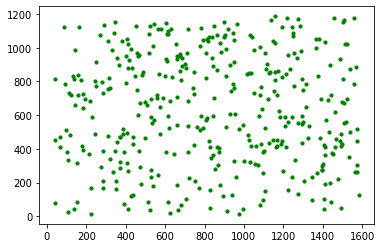

In [5]:
plt.scatter(y,x, s=10, c = 'g')

Find temporal distribution. This would be more meaningful if each timepoint in an experimental movie is tied to the confluency of the cellular monolayer at that timepoint. This current analysis is lacking as `t=0` can represent completely different tissue scenarios over different experiments. Segmentation is stored in hdf5 tracking files though, this could be a future avenue of analysis. 

In [6]:
t = []
for i in apop_dict:
    t.append(apop_dict[i])
t

['635',
 '855',
 '866',
 '874',
 '887',
 '906',
 '944',
 '944',
 '944',
 '932',
 '920',
 '957',
 '939',
 '1005',
 '1005',
 '928',
 '1003',
 '1003',
 '1003',
 '1003',
 '1033',
 '1023',
 '1023',
 '1014',
 '1000',
 '1007',
 '1046',
 '1101',
 '1101',
 '1100',
 '1100',
 '1099',
 '1099',
 '1099',
 '1099',
 '1066',
 '1084',
 '1113',
 '1113',
 '1113',
 '1157',
 '1129',
 '1129',
 '1167',
 '1151',
 '1161',
 '653',
 '1056',
 '628',
 '855',
 '992',
 '1133',
 '746',
 '838',
 '876',
 '903',
 '941',
 '939',
 '976',
 '973',
 '977',
 '1037',
 '1053',
 '1099',
 '1074',
 '1129',
 '1160',
 '1172',
 '598',
 '593',
 '844',
 '862',
 '1048',
 '1074',
 '847',
 '955',
 '458',
 '281',
 '99',
 '462',
 '629',
 '180',
 '426',
 '516',
 '859',
 '986',
 '337',
 '338',
 '409',
 '434',
 '600',
 '943',
 '740',
 '43',
 '401',
 '768',
 '770',
 '791',
 '798',
 '775',
 '98',
 '978',
 '982',
 '1017',
 '1015',
 '1156',
 '1156',
 '1067',
 '716',
 '191',
 '548',
 '768',
 '989',
 '930',
 '955',
 '975',
 '981',
 '1002',
 '957',
 '

(array([98., 77., 76., 71., 63.]),
 array([  0. ,  59.2, 118.4, 177.6, 236.8, 296. ]),
 <a list of 5 Patch objects>)

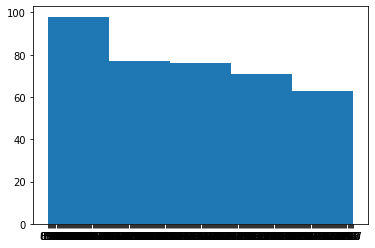

In [7]:
plt.hist(t, bins = 5)